In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots","FFTW","LinearAlgebra","DSP"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [717857b8] + DSP v0.7.9
    Updating `~/Documents/programming/BME-574-2024/Manifest.toml`
  [47edcb42] - ADTypes v1.6.2
  [1520ce14] - AbstractTrees v0.4.5
  [7d9f7c33] - Accessors v0.1.37
  [79e6a3ab] - Adapt v4.0.4
  [66dad0bd] - AliasTables v1.1.3
  [ec485272] - ArnoldiMethod v0.4.0
  [4fba245c] - ArrayInterface v7.15.0
  [13072b0f] - AxisAlgorithms v1.1.0
  [39de3d68] - AxisArrays v0.4.7
  [e2ed5e7c] - Bijections v0.1.7
  [62783981] - BitTwiddlingConvenienceFunctions v0.1.6
  [e1450e63] - BufferedStreams v1.2.2
  [fa961155] - CEnum v0.5.0
  [2a0fbf3d] - CPUSummary v0.2.6
  [49dc2e85] - Calculus v0.5.1
  [aafaddc9] - CatIndices v0.2.2
  [d360d2e6] - ChainRulesCore v1.24.0
  [fb6a15b2]

In [4]:
using Plots, FFTW, DSP, LinearAlgebra, Random, Distributions

[ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]


In [5]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [44]:
x = [rand(nd)]
N = 1024
γ = 0.1
for i in 2:N
    push!(x, x[end]*(1-γ) + rand(nd))
end

In [33]:
x

1024-element Vector{Float64}:
  2.416092019904646
  1.6553957986871843
  1.5286822604716608
  1.4118378122597197
  0.6943965737343064
  0.7698116840013948
 -0.43557725510924783
 -0.8245314573019422
 -0.9505402827221232
 -0.2513766397649547
 -0.9011012259591777
 -0.6323559431258108
 -1.1782985099883527
  ⋮
  1.757951183126342
  1.0783060594762186
  1.1370413774151127
  1.4400898170593317
  2.0698386851955854
  2.299347918306226
  1.6752434298630903
  0.7922491738896565
  2.111948908256988
  0.9971045550247333
 -0.23301667479681365
 -1.417331670448084

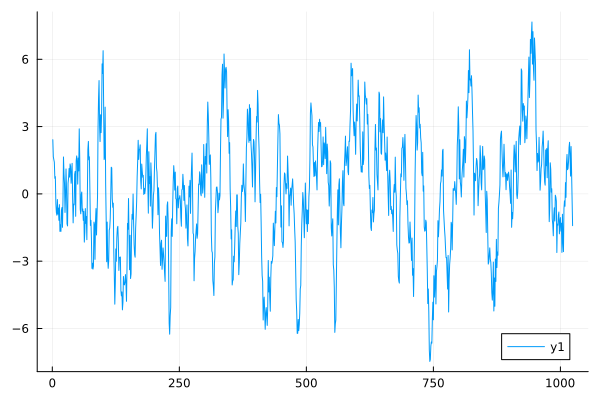

In [34]:
plot(x)

In [18]:
y = [0.0]
N = 1024
γ = 0.1
for i in 2:1024
    push!(y, y[end] + rand(nd))
end

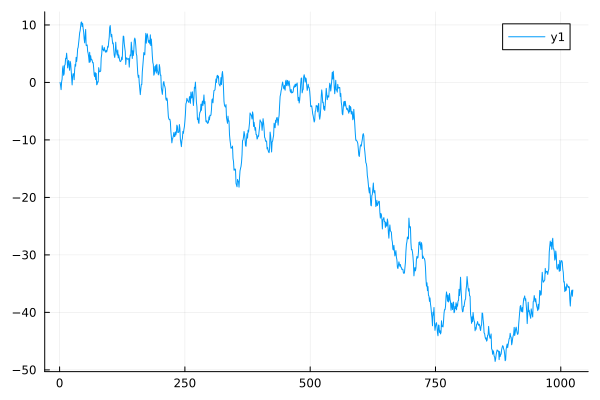

In [19]:
plot(y)

In [20]:
fx = fft(x)

1024-element Vector{ComplexF64}:
 -205.76364682255377 + 0.0im
  29.829690546632023 + 326.5372114448852im
  365.51861443630537 - 53.757113367639946im
  32.617148091385566 - 76.5722742541791im
   139.6016611170947 + 30.559273336299754im
  -176.0525933726231 + 223.0018004594545im
   98.51068822234865 - 71.60070994809506im
 -141.01962240058378 + 16.23490267067833im
  380.00898531960803 - 4.466484640806109im
  -2.816843459191193 - 234.15010042191744im
 -199.29139954906927 + 293.0606217948299im
  122.36682286654026 - 128.72473297416778im
 -0.8839594438115812 - 122.63061083588795im
                     ⋮
 -0.8839594438115626 + 122.63061083588795im
  122.36682286654026 + 128.72473297416778im
  -199.2913995490693 - 293.06062179482996im
 -2.8168434591911975 + 234.15010042191747im
   380.0089853196081 + 4.466484640806058im
 -141.01962240058376 - 16.234902670678323im
   98.51068822234865 + 71.60070994809506im
  -176.0525933726231 - 223.0018004594545im
   139.6016611170947 - 30.559273336299754im
  

In [21]:
abs(fx[1])

205.76364682255377

In [22]:
px = abs.(fx) .^2

1024-element Vector{Float64}:
  42338.67835371664
 107516.3608963095
 136493.68473705777
   6927.191534072597
  20422.49297349483
  80724.31864138455
  14831.01735911202
  20150.105966729632
 144426.77840868462
  54834.204134667605
 125601.58998099908
  31543.696217722038
  15039.048098281302
      ⋮
  15039.048098281302
  31543.696217722038
 125601.58998099912
  54834.20413466762
 144426.77840868468
  20150.105966729625
  14831.01735911202
  80724.31864138455
  20422.49297349483
   6927.191534072597
 136493.68473705777
 107516.3608963095

In [37]:
f = fftfreq(N,1.0)

1024-element Frequencies{Float64}:
  0.0
  0.0009765625
  0.001953125
  0.0029296875
  0.00390625
  0.0048828125
  0.005859375
  0.0068359375
  0.0078125
  0.0087890625
  0.009765625
  0.0107421875
  0.01171875
  ⋮
 -0.01171875
 -0.0107421875
 -0.009765625
 -0.0087890625
 -0.0078125
 -0.0068359375
 -0.005859375
 -0.0048828125
 -0.00390625
 -0.0029296875
 -0.001953125
 -0.0009765625

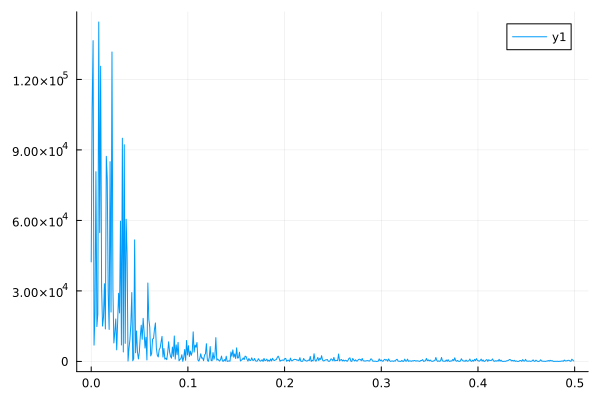

In [38]:
plot(f[1:512],px[1:512])

In [29]:
frx = rfft(x)

513-element Vector{ComplexF64}:
 -205.76364682255377 + 0.0im
   29.82969054663201 + 326.5372114448852im
  365.51861443630537 - 53.757113367639946im
   32.61714809138556 - 76.57227425417913im
   139.6016611170947 + 30.55927333629976im
  -176.0525933726231 + 223.0018004594545im
   98.51068822234863 - 71.60070994809507im
 -141.01962240058376 + 16.23490267067833im
   380.0089853196081 - 4.46648464080609im
 -2.8168434591911735 - 234.15010042191744im
 -199.29139954906924 + 293.0606217948299im
  122.36682286654028 - 128.72473297416775im
 -0.8839594438115697 - 122.63061083588794im
                     ⋮
 -24.280066712552895 - 1.5752875642341024im
 -0.3857483759147158 + 14.167612246317503im
   9.088874363130437 + 13.447364833507166im
  -4.047969504607067 + 15.213802150552933im
  18.323036805303623 - 11.986250624969735im
  -9.831597949284586 + 18.843943462329513im
 -11.407973227147323 - 6.808106218189451im
  -4.810071816029094 - 4.821821844812021im
 -24.675380031117996 - 18.627418001840553im
 -1

In [30]:
frpx = abs.(frx) .^ 2

513-element Vector{Float64}:
  42338.67835371664
 107516.3608963095
 136493.68473705777
   6927.191534072602
  20422.49297349483
  80724.31864138455
  14831.01735911202
  20150.105966729625
 144426.77840868468
  54834.204134667605
 125601.58998099908
  31543.696217722038
  15039.048098281299
      ⋮
    592.0031704760496
    200.87003857152652
    263.4392581542149
    247.84583298639785
    479.4038818130985
    451.75452344784804
    176.49216342946
     46.38675677846383
    955.8550810953903
    545.554817428936
    208.3907095375655
     12.760180295391562

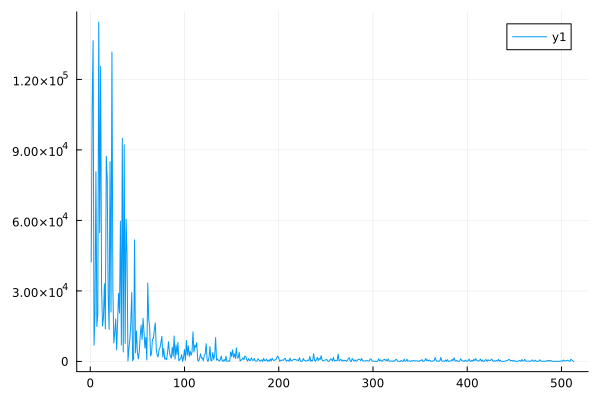

In [31]:
plot(frpx)

In [45]:
pw = welch_pgram(x)

DSP.Periodograms.Periodogram{Float64, Frequencies{Float64}, Vector{Float64}}([48.08186634208686, 105.51852133239537, 125.71607968677846, 79.23817249075843, 50.90459942151521, 31.567537573227238, 33.055635481703156, 18.80706448774582, 9.206056188989132, 8.182608680181886  …  0.7393533863239133, 0.5520450173774382, 0.7942784989582404, 0.44776098236572687, 0.6048673129120137, 0.5569554993509044, 0.8028740857373424, 0.5858891536245816, 0.743513094405508, 0.28650981913874113], [0.0, 0.0078125, 0.015625, 0.0234375, 0.03125, 0.0390625, 0.046875, 0.0546875, 0.0625, 0.0703125  …  0.4296875, 0.4375, 0.4453125, 0.453125, 0.4609375, 0.46875, 0.4765625, 0.484375, 0.4921875, 0.5])

In [40]:
pw.freq

65-element Frequencies{Float64}:
 0.0
 0.0078125
 0.015625
 0.0234375
 0.03125
 0.0390625
 0.046875
 0.0546875
 0.0625
 0.0703125
 0.078125
 0.0859375
 0.09375
 ⋮
 0.4140625
 0.421875
 0.4296875
 0.4375
 0.4453125
 0.453125
 0.4609375
 0.46875
 0.4765625
 0.484375
 0.4921875
 0.5

In [41]:
pw.power

65-element Vector{Float64}:
  88.65799634681503
 213.09542173182967
 204.16897684832188
 100.14714004432702
  82.88507370827362
  33.35350030541848
  23.234121373568733
  28.319615824170494
  17.47875693705322
  15.53699991781928
  11.125717438826989
   6.770632298447238
   7.303038697376985
   ⋮
   0.4700458155933888
   0.43089280392857143
   0.7224882806691961
   0.8965783316464919
   0.3510787777884387
   0.40667084396864855
   0.40635072241781484
   0.4473102950993834
   1.004594144330899
   0.7462648224630305
   0.6597394603730624
   0.11046158605341329

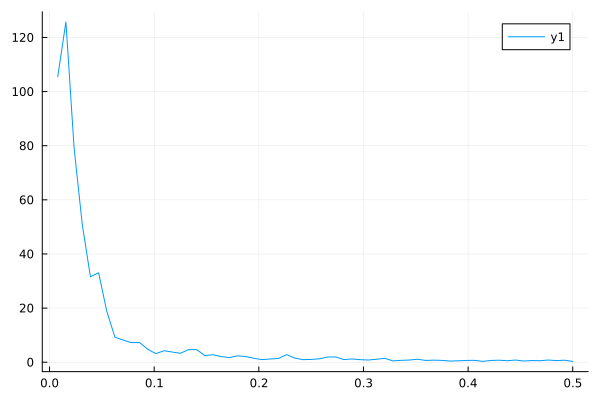

In [46]:
plot(pw.freq[2:end],pw.power[2:end])